In [1]:
import pandas as pd
import numpy as np

In [2]:
openpath = "E:/Old Downloads Folder/Research Stuff/Climate Data/Pittsburgh_UHII.csv"

with open(openpath) as f:
    
    data = pd.read_csv(f, sep = ',')

codes = []
    
for index, row in data.iterrows():
    
    code = row['STATION']
    
    codes.append(code)
    
data = data.set_index(['STATION'])

In [3]:
# This code finds the integrals of the first peak from Ovito analyses

s1 = 'E:/Old Downloads Folder/Research Stuff/Jupyter Notebooks/Coordination Analysis Data/1 Mile Radius/'

s2 = '_first_peak.txt'

firstPeakIntegrals = pd.DataFrame()

for code in codes:
    
    openpath = s1 + code + s2
    
    with open(openpath) as f:
    
        val = f.read()

        temp_df = pd.DataFrame([[code, float(val)]], columns = ['Station', 'First Peak Integral'])
        
        firstPeakIntegrals = firstPeakIntegrals.append(temp_df, ignore_index = True)
        
firstPeakIntegrals = firstPeakIntegrals.set_index(['Station'])

In [4]:
# This code finds the data found from QGIS and the average albedo of every area

s1 = 'E:/Old Downloads Folder/Research Stuff/GIS Maps/Albedo Data/1 Mile Radius/'

s2 = '_weighted_albedo.txt'

albedos = pd.DataFrame()

for code in codes:
    
    openpath = s1 + code + s2
    
    with open(openpath) as f:
    
        val = f.read()

        temp_df = pd.DataFrame([[code, float(val)]], columns = ['Station', 'Weighted Albedo'])
        
        albedos = albedos.append(temp_df, ignore_index = True)
        
albedos = albedos.set_index(['Station'])

In [5]:
# This code finds the clustering data from OVITO and finds the location of the first drop

s1 = 'E:/Old Downloads Folder/Research Stuff/Jupyter Notebooks/Coords Folder/Weather Station Coords/First Drops/'

s2 = '_first_drop.txt'

drops = pd.DataFrame()

for code in codes:
    
    openpath = s1 + code + s2
    
    with open(openpath) as f:
    
        val = f.read()

        temp_df = pd.DataFrame([[code, float(val)]], columns = ['Station', 'First Drop'])
        
        drops = drops.append(temp_df, ignore_index = True)
        
drops = drops.set_index(['Station'])

In [6]:
# This code finds the buildings per cluster at the location of the first drop

s1 = 'E:/Old Downloads Folder/Research Stuff/Jupyter Notebooks/Coords Folder/Weather Station Coords/1 Mile Radius/First Drops/Buildings per Cluster/'

s2 = '_buildings_per_cluster.txt'

perCluster = pd.DataFrame()

for code in codes:
    
    openpath = s1 + code + s2
    
    with open(openpath) as f:
    
        val = f.read()

        temp_df = pd.DataFrame([[code, float(val)]], columns = ['Station', 'Buildings Per Cluster'])
        
        perCluster = perCluster.append(temp_df, ignore_index = True)
        
perCluster = perCluster.set_index(['Station'])

In [7]:
# # This code finds the data found from QGIS and the average albedo of every area

# s1 = 'E:/Old Downloads Folder/Research Stuff/GIS Maps/Albedo Data/1 Mile Radius/'

# s2 = '_area_albedo.txt'

# areaAlbedos = pd.DataFrame()

# for code in codes:
    
#     openpath = s1 + code + s2
    
#     with open(openpath) as f:
    
#         val = f.read()

#         temp_df = pd.DataFrame([[code, float(val)]], columns = ['Station', 'Area Albedo'])
        
#         areaAlbedos = areaAlbedos.append(temp_df, ignore_index = True)
        
# areaAlbedos = areaAlbedos.set_index(['Station'])

In [8]:
# This code finds the data found from QGIS and the average albedo of every area

s1 = 'E:/Old Downloads Folder/Research Stuff/GIS Maps/Albedo Data/1 Mile Radius/'

s2 = '_area_no_river_albedo.txt'

noRiver = pd.DataFrame()

for code in codes:
    
    openpath = s1 + code + s2
    
    with open(openpath) as f:
    
        val = f.read()

        temp_df = pd.DataFrame([[code, float(val)]], columns = ['Station', 'No River Albedo'])
        
        noRiver = noRiver.append(temp_df, ignore_index = True)
        
noRiver = noRiver.set_index(['Station'])

In [9]:
# Find the total number of buildings in every station area

import os, os.path

s1 = 'E:/Old Downloads Folder/Research Stuff/GIS Maps/Rooftops/1 Mile Radius/'

buildingsPerStation = pd.DataFrame()

for code in codes:
    
    folder = s1 + code
    
    val = len([name for name in os.listdir(folder) if os.path.isfile(os.path.join(folder, name))])
    
    temp_df = pd.DataFrame([[code, int(val)]], columns = ['Station', 'Buildings In Area'])
        
    buildingsPerStation = buildingsPerStation.append(temp_df, ignore_index = True)

buildingsPerStation = buildingsPerStation.set_index(['Station'])    

In [10]:
# # Import the distance to the nearest river

# s1 = 'E:/Old Downloads Folder/Research Stuff/Climate Data/Pittsburgh_Dist2River.csv'

# distToRiver = pd.read_csv(s1, sep = ',')

# distToRiver = distToRiver.set_index(['Station'])

# distToRiver.columns = ['Distance to River']

# distToRiver['Distance to River'] *= 364000

In [11]:
# This code finds the Hexatic order paramter average values

s1 = 'E:/Old Downloads Folder/Research Stuff/Jupyter Notebooks/Hexatic Order Parameters/1 Mile Radius/'

s2 = '_hexatic_order_parameter.txt'

hexatic = pd.DataFrame()

for code in codes:
    
    openpath = s1 + code + s2
    
    with open(openpath) as f:
    
        val = f.read()

        temp_df = pd.DataFrame([[code, float(val[4:])]], columns = ['Station', 'Hex Order Average'])
        
        hexatic = hexatic.append(temp_df, ignore_index = True)
        
hexatic = hexatic.set_index(['Station'])

In [12]:
# Now we need to merge these frames together

final_frame = pd.DataFrame()

final_frame = pd.concat([data, firstPeakIntegrals, albedos, drops, perCluster, buildingsPerStation, noRiver, hexatic], axis = 1, sort = False)

final_frame

,UHI,First Peak Integral,Weighted Albedo,First Drop,Buildings Per Cluster,Buildings In Area,No River Albedo,Hex Order Average
USC00360022,2.411053,2.556907,0.558959,261.630,11.687259,3027,0.47468,0.698365
USC00360861,5.129269,2.351269,0.537185,421.805,9.936210,5296,0.49458,0.736805
USC00362574,3.167400,1.716654,0.536597,122.514,18.259740,4218,0.46041,0.704200
USC00365573,1.490365,1.356082,0.549603,159.995,301.275862,8737,0.49619,0.732442
USC00365918,2.149054,1.096808,0.530519,137.334,53.600000,2412,0.41937,0.750746
USW00014762,4.535355,1.712639,0.558195,189.215,187.956522,4323,0.48988,0.775207
USW00094823,3.455903,4.642765,0.586712,137.287,2.120172,494,0.51167,0.650551


In [13]:
# Now to do the regression analysis

from sklearn.linear_model import LinearRegression

# # Create linear regression object

mlr = LinearRegression()

# # Fit linear regression

# mlr.fit(final_frame[['First Peak Integral', 'Weighted Albedo', 'First Drop', 'Buildings Per Cluster', 'Area Albedo', 'Buildings In Area', 'Distance to River']], final_frame['UHI'])

# # Get the slope and intercept of the line best fit

# print(mlr.intercept_)

# print(mlr.coef_)

In [14]:
from sklearn.metrics import r2_score

# y_true = final_frame['UHI'].tolist()

# y_pred = []

# for index, data in final_frame.iterrows():
    
#     pred = mlr.intercept_ + data['First Peak Integral'] * mlr.coef_[0] + data['Weighted Albedo'] * mlr.coef_[1] + data['First Drop'] * mlr.coef_[2] + data['Buildings Per Cluster'] * mlr.coef_[3] + data['Area Albedo'] * mlr.coef_[4] + data['Buildings In Area'] * mlr.coef_[5] + data['Distance to River'] * mlr.coef_[6]
    
#     y_pred.append(pred)

# print('The R2 value using all the predictor variables is: ' + str(r2_score(y_true, y_pred)))

In [15]:
# plot_frame = final_frame.copy()

# plot_frame['Predicted UHI'] = y_pred

# plot_frame['UHI Diff'] = plot_frame['Predicted UHI'] - plot_frame['UHI']

# plot_frame

In [16]:
# This bit of code is my attempt to find the most important predictor variables

# predict_frame = final_frame.copy().drop(['UHI'], axis = 1)

# numCols = len(predict_frame.columns)

# y_true = final_frame['UHI'].tolist()

# for i in range(numCols):
    
#     predictorCols = np.arange(1, numCols + 1)

#     predictorCols = np.delete(predictorCols, i)
    
#     colNames = []
    
#     for col in predictorCols:
        
#         colNames.append(predict_frame.columns[col - 1])
        
#     mlr.fit(final_frame[colNames], final_frame['UHI'])
    
#     y_pred = []
    
#     for index, data in final_frame.iterrows():
    
#         pred = mlr.intercept_
        
#         for item in colNames:
            
#             pred += data[item] * mlr.coef_[colNames.index(item)]
    
#         y_pred.append(pred)
    
#     print('The R2 value is: ' + str(round(r2_score(y_true, y_pred), 2)), '--', \
#           'The dropped variable is: ' + str(predict_frame.columns[i]))

In [17]:
# This one goes through and outputs the R^2 of all combos of input variables

total_frame = pd.DataFrame()

from itertools import combinations

predict_frame = final_frame.copy()

predict_frame = predict_frame.drop(['USC00365573'])

y_true = predict_frame['UHI'].tolist()

predict_frame = predict_frame.drop(['UHI'], axis = 1)

cols = predict_frame.columns

variables = 3

varDict = {}

for i in range(1, variables + 1):
    
    combos = list(combinations(cols, i))
    
    for j in range(len(combos)):
        
        colNames = list(combos[j])
        
        mlr.fit(predict_frame[colNames], y_true)
    
        y_pred = []
    
        for index, data in predict_frame.iterrows():

            pred = mlr.intercept_
            
            for item in colNames:
                
                pred += data[item] * mlr.coef_[colNames.index(item)]

            y_pred.append(pred)
        
        r2 = round(r2_score(y_true, y_pred), 3)
        
        temp_frame = pd.DataFrame()
        
        if r2 >= 0.8:
            
            temp_frame['R2'] = [r2]

            for k in range(0, variables):

                try:

                    var = colNames[k]

                except:

                    var = 'N/A'
                
                if var in varDict:
                        
                    varDict[var] += 1
                        
                else:
                        
                    varDict[var] = 1
                
                if var == 'N/A':
                    temp_frame['Variable #' + str(k + 1)] = [var]
                else:
                    temp_frame['Variable #' + str(k + 1)] = str([var][0]) + ' - ' + str(mlr.coef_[k])
            
            temp_frame['Intercept'] = mlr.intercept_
            total_frame = total_frame.append(temp_frame)    

total_frame.to_csv('Variable_Combos_1mile.csv', index = False)

In [18]:
varDict.pop('N/A')

varDict

{'Weighted Albedo': 6,
 'No River Albedo': 14,
 'Hex Order Average': 7,
 'First Peak Integral': 6,
 'First Drop': 3,
 'Buildings Per Cluster': 4,
 'Buildings In Area': 6}

[Text(0, 0.5, 'Actual UHI')]

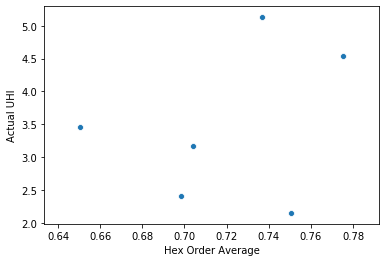

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.scatterplot(y = y_true, x = predict_frame['Hex Order Average'])
ax.set(ylabel = 'Actual UHI')

In [20]:
copy_frame = final_frame.copy()

copy_frame = copy_frame.drop(['First Drop', 'First Peak Integral', 'Buildings In Area', 'Buildings Per Cluster'], axis = 1)

copy_frame = copy_frame.drop(['USC00365573'])

copy_frame

,UHI,Weighted Albedo,No River Albedo,Hex Order Average
USC00360022,2.411053,0.558959,0.47468,0.698365
USC00360861,5.129269,0.537185,0.49458,0.736805
USC00362574,3.167400,0.536597,0.46041,0.704200
USC00365918,2.149054,0.530519,0.41937,0.750746
USW00014762,4.535355,0.558195,0.48988,0.775207
USW00094823,3.455903,0.586712,0.51167,0.650551


In [21]:
mlr.fit(copy_frame[['Weighted Albedo', 'No River Albedo', 'Hex Order Average']], copy_frame['UHI'])

y_true = copy_frame['UHI']

y_predict = []

for index, data in copy_frame.iterrows():
    
    pred = mlr.intercept_ + data['Weighted Albedo'] * mlr.coef_[0] + data['No River Albedo'] * mlr.coef_[1] + data['Hex Order Average'] * mlr.coef_[2]
    
    y_predict.append(pred)
    
copy_frame['Predictions'] = y_predict

print('The R2 value using the predictor variables is: ' + str(round(r2_score(y_true, y_predict), 2)))

print(mlr.intercept_, mlr.coef_)

copy_frame

The R2 value using the predictor variables is: 0.94
-7.201716019816068 [-34.98531368  46.53070085  10.92609538]


,UHI,Weighted Albedo,No River Albedo,Hex Order Average,Predictions
USC00360022,2.411053,0.558959,0.47468,0.698365,2.960514
USC00360861,5.129269,0.537185,0.49458,0.736805,5.068240
USC00362574,3.167400,0.536597,0.46041,0.704200,3.142619
USC00365918,2.149054,0.530519,0.41937,0.750746,1.954210
USW00014762,4.535355,0.558195,0.48988,0.775207,4.534104
USW00094823,3.455903,0.586712,0.51167,0.650551,3.188346


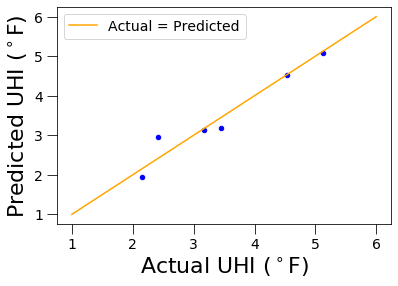

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

xline = np.linspace(1, 6)
yline = np.linspace(1, 6)

plt.plot(xline, yline, color = 'orange')
plt.scatter(x = y_true, y = y_predict, color = 'blue', s=20)
plt.xlabel('Actual UHI ($^\circ$F)', fontsize=22)
plt.ylabel('Predicted UHI ($^\circ$F)', fontsize=22)
plt.legend(['Actual = Predicted'], fontsize=14)
plt.tick_params(length=10, labelsize=14)
plt.savefig('test.png', bbox_inches='tight')